# 1. Importing Libraries and Loading the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = '/content/Customer Data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display the first few rows to understand the structure
print("\nFirst Few Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

# 2. Data Preprocessing

### 2.1: Handle Missing Values

In [3]:
# Handle missing values for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns only
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verify no missing values remain in the dataset
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


### 2.2: Normalize Numeric Features

In [4]:
# Scale numeric features
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows after scaling
print("\nFirst Few Rows After Scaling:")
print(df.head())


First Few Rows After Scaling:
  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  0.002148           0.818182   0.001945          0.000000   
1  C10002  0.168169           0.909091   0.000000          0.000000   
2  C10003  0.131026           1.000000   0.015766          0.018968   
3  C10004  0.087521           0.636364   0.030567          0.036775   
4  C10005  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.

# 3. K-Means Clustering for Binary Classification

### 3.1: Apply K-Means

In [5]:
# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

# Display the distribution of the clusters
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Display the first few rows with the Cluster column
print("\nFirst Few Rows with Cluster Labels:")
print(df.head())


Cluster Distribution:
Cluster
0    4915
1    4035
Name: count, dtype: int64

First Few Rows with Cluster Labels:
  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  0.002148           0.818182   0.001945          0.000000   
1  C10002  0.168169           0.909091   0.000000          0.000000   
2  C10003  0.131026           1.000000   0.015766          0.018968   
3  C10004  0.087521           0.636364   0.030567          0.036775   
4  C10005  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0      

# 4. Splitting the Dataset

In [6]:
# Define features (X) and target (y)
X = df.drop(columns=['Cluster', 'CUST_ID'])  # Adjust if necessary
y = df['Cluster']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (6265, 17) (6265,)
Validation Set Shape: (1342, 17) (1342,)
Test Set Shape: (1343, 17) (1343,)


# 5. Train and Evaluate Decision Tree Classifier

### 5.1: Train the Model

In [7]:
# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = tree_model.predict(X_val)
print("\nValidation Set Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Set Accuracy: 0.9918032786885246

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       716
           1       0.99      0.99      0.99       626

    accuracy                           0.99      1342
   macro avg       0.99      0.99      0.99      1342
weighted avg       0.99      0.99      0.99      1342



### 5.2: Test the Model

In [8]:
# Evaluate the model on the test set
y_test_pred = tree_model.predict(X_test)
print("\nTest Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))
print("\nTest Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Set Accuracy: 0.9932985852568875

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       754
           1       0.99      0.99      0.99       589

    accuracy                           0.99      1343
   macro avg       0.99      0.99      0.99      1343
weighted avg       0.99      0.99      0.99      1343


Test Set Confusion Matrix:
[[750   4]
 [  5 584]]


## Feature Importance Analysis

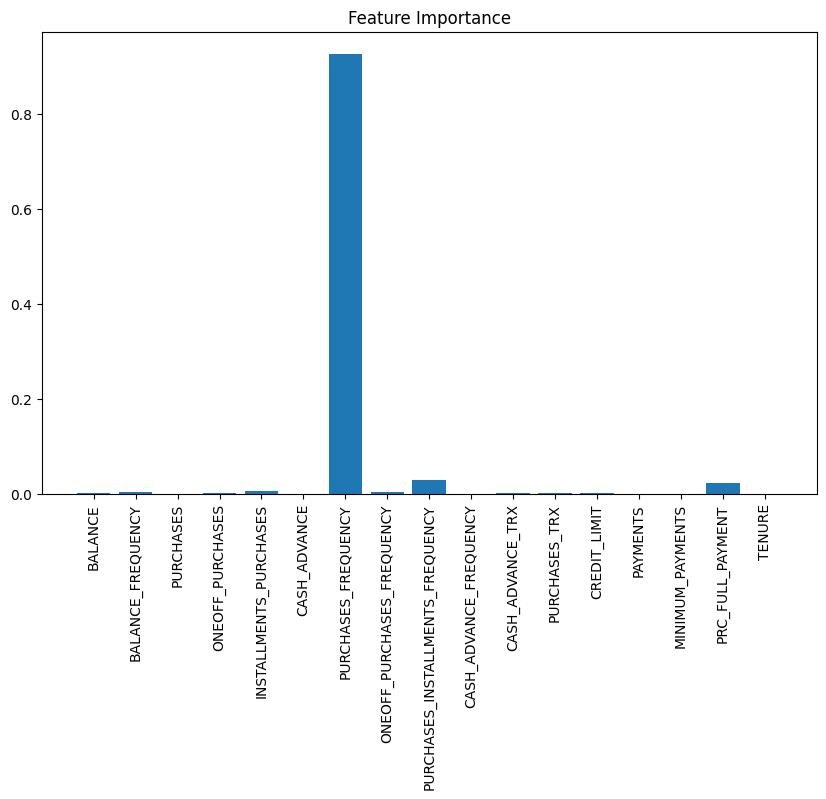

In [10]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = tree_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()
